In [1]:
import numpy as np 
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [2]:
# Part 1 a)

In [3]:
import pandas as pd

pathPenguins =  input("Enter path to penguins.csv file: ")
penguins = pd.read_csv(pathPenguins)

print(penguins.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [4]:
# i. convert island and sex into 1-hot vectors
penguin_one_hot_vector = pd.get_dummies(penguins, columns = ['island', 'sex'])

# get names of columns generated by get_dummies
print(penguin_one_hot_vector.columns)

Index(['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [5]:
# convert to 0s and 1s where False == 0 and True == 1
penguin_one_hot_vector["island_Biscoe"] = penguin_one_hot_vector["island_Biscoe"].astype(int)
penguin_one_hot_vector["island_Dream"] = penguin_one_hot_vector["island_Dream"].astype(int)
penguin_one_hot_vector["island_Torgersen"] = penguin_one_hot_vector["island_Torgersen"].astype(int)

penguin_one_hot_vector["sex_FEMALE"] = penguin_one_hot_vector["sex_FEMALE"].astype(int)
penguin_one_hot_vector["sex_MALE"] = penguin_one_hot_vector["sex_MALE"].astype(int)

print(penguin_one_hot_vector)

    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie              39.1             18.7                181   
1    Adelie              39.5             17.4                186   
2    Adelie              40.3             18.0                195   
3    Adelie              36.7             19.3                193   
4    Adelie              39.3             20.6                190   
..      ...               ...              ...                ...   
328  Gentoo              47.2             13.7                214   
329  Gentoo              46.8             14.3                215   
330  Gentoo              50.4             15.7                222   
331  Gentoo              45.2             14.8                212   
332  Gentoo              49.9             16.1                213   

     body_mass_g  island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  \
0           3750              0             0                 1           0   
1           3

In [6]:
# ii. convert island and sex into features ourselves
penguins_manual_categories = penguins
penguins_manual_categories['Biscoe'] = penguins_manual_categories['island']
penguins_manual_categories['Dream'] = penguins_manual_categories['island']
penguins_manual_categories['Torgersen'] = penguins_manual_categories['island']
penguins_manual_categories['Female'] = penguins_manual_categories['sex']
penguins_manual_categories['Male'] = penguins_manual_categories['sex']

penguins_manual_categories['Biscoe'].replace('Biscoe', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Biscoe'] != 1, 'Biscoe'] = 0

penguins_manual_categories['Dream'].replace('Dream', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Dream'] != 1, 'Dream'] = 0

penguins_manual_categories['Torgersen'].replace('Torgersen', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Torgersen'] != 1, 'Torgersen'] = 0

penguins_manual_categories['Female'].replace('FEMALE', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Female'] != 1, 'Female'] = 0

penguins_manual_categories['Male'].replace('MALE', 1, inplace=True)
penguins_manual_categories.loc[penguins_manual_categories['Male'] != 1, 'Male'] = 0


print(penguins_manual_categories)
            


    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7                181   
1    Adelie  Torgersen              39.5             17.4                186   
2    Adelie  Torgersen              40.3             18.0                195   
3    Adelie  Torgersen              36.7             19.3                193   
4    Adelie  Torgersen              39.3             20.6                190   
..      ...        ...               ...              ...                ...   
328  Gentoo     Biscoe              47.2             13.7                214   
329  Gentoo     Biscoe              46.8             14.3                215   
330  Gentoo     Biscoe              50.4             15.7                222   
331  Gentoo     Biscoe              45.2             14.8                212   
332  Gentoo     Biscoe              49.9             16.1                213   

     body_mass_g     sex Biscoe Dream T

In [7]:
#Part 1 b)

In [8]:
pathAbalone =  input("Enter path to abalone.csv file: ")
abalone = pd.read_csv(pathAbalone)

print(abalone)

     Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0       F         0.605     0.470   0.165       1.1775         0.6110   
1       M         0.550     0.425   0.150       0.8315         0.4110   
2       M         0.460     0.345   0.110       0.4595         0.2350   
3       F         0.650     0.475   0.165       1.3875         0.5800   
4       M         0.575     0.470   0.140       0.8375         0.3485   
...   ...           ...       ...     ...          ...            ...   
4172    F         0.570     0.450   0.150       0.9645         0.5310   
4173    F         0.645     0.535   0.190       1.2395         0.4680   
4174    M         0.695     0.550   0.195       1.6645         0.7270   
4175    F         0.585     0.475   0.165       1.0530         0.4580   
4176    F         0.565     0.450   0.165       0.8870         0.3700   

      VisceraWeight  ShellWeight  Rings  
0            0.2275       0.2920      9  
1            0.1765       0.2165     10

In [9]:
# abalone dataset can be used as is since the features are already in numerical format

In [10]:
# Part 2

In [11]:
# penguins
print(penguins.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'Biscoe', 'Dream',
       'Torgersen', 'Female', 'Male'],
      dtype='object')


In [12]:
import matplotlib.pyplot as plt
import imageio
import matplotlib.ticker as mtick

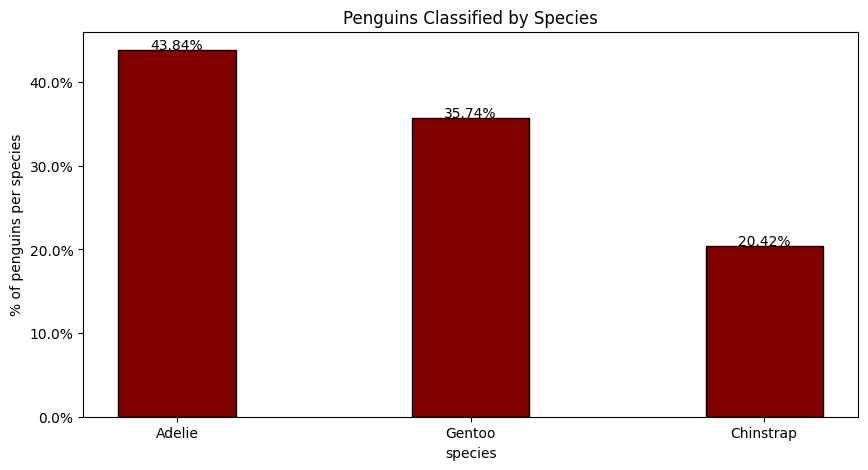

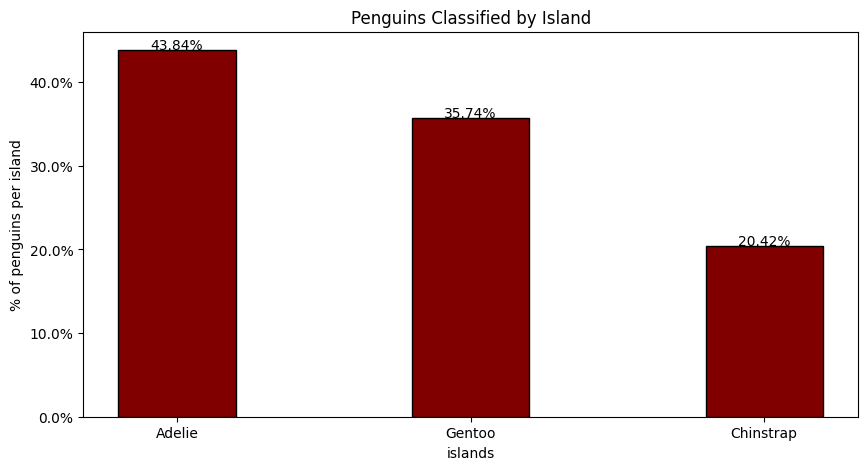

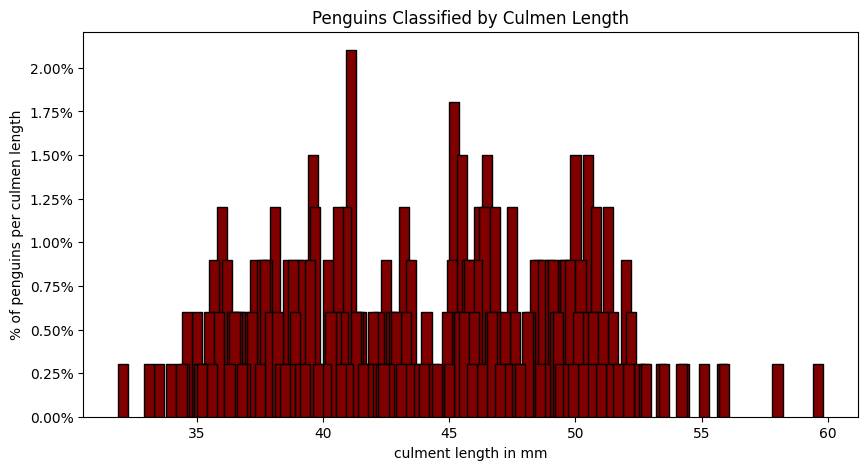

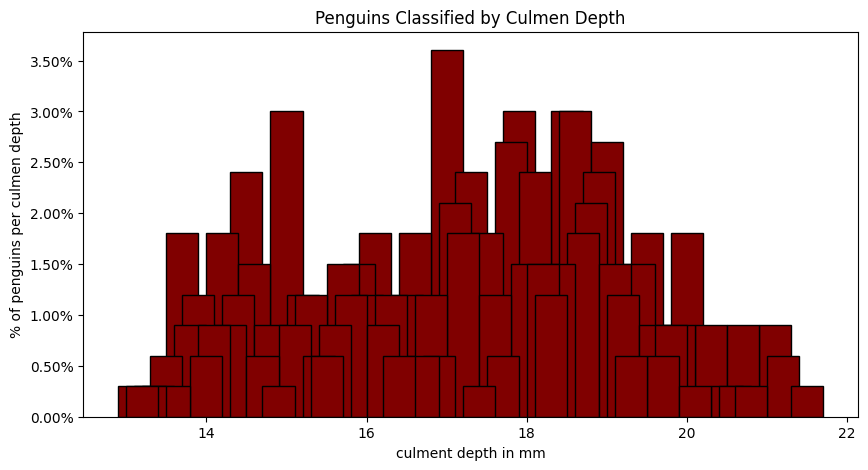

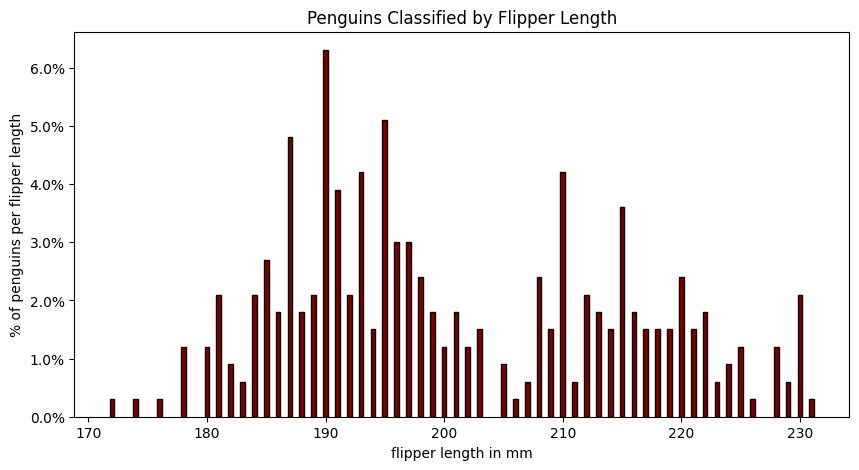

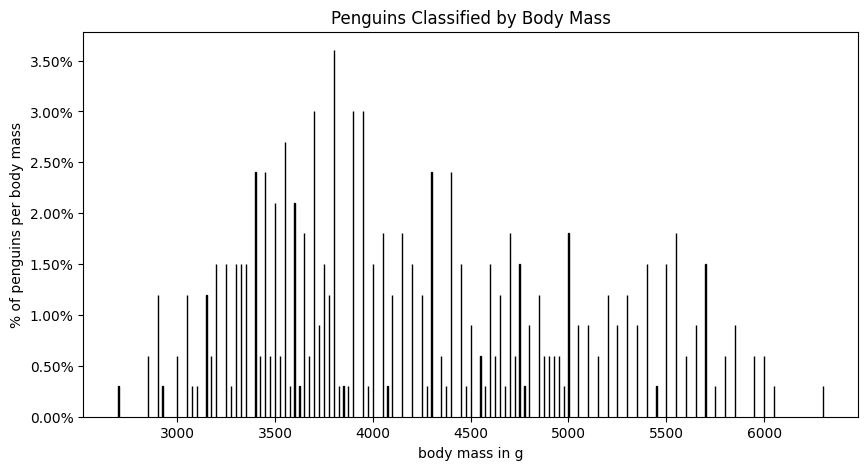

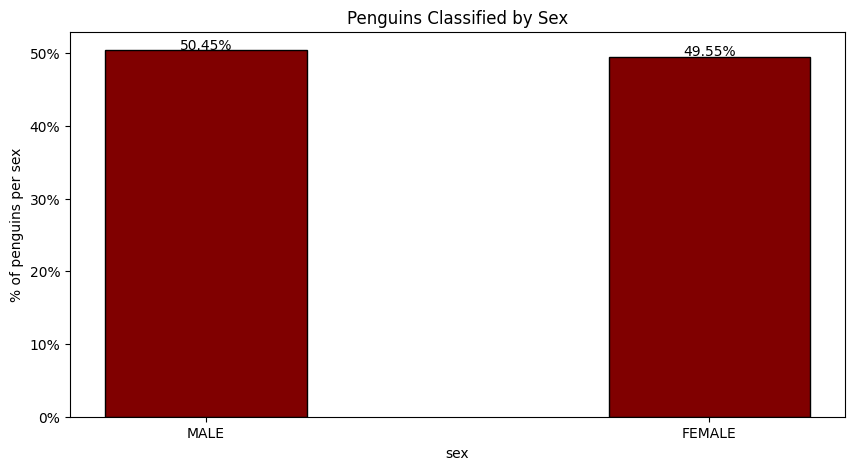

In [13]:
path = input("Enter the path to save penguin images (last character should be a backslash \): ")

imagePenguins = []

# % instances of species
instanceSpecies = penguins.species.value_counts(normalize=True) * 100
instanceDictSpecies = instanceSpecies.to_dict()

figSpecies = plt.figure(figsize = (10, 5))
figSpecies = plt.gca()
figSpecies.yaxis.set_major_formatter(mtick.PercentFormatter())

barsSpecies = plt.bar(list(instanceDictSpecies.keys()), list(instanceDictSpecies.values()), color ='maroon', edgecolor = "black",
        width = 0.4)

for bar_graph in barsSpecies:
    height = bar_graph.get_height()
    plt.text(x=bar_graph.get_x() + bar_graph.get_width() / 2, y=height + .10, s="{}%".format(round(height, 2)), ha='center')

plt.xlabel("species")
plt.ylabel("% of penguins per species")
plt.title("Penguins Classified by Species")

figSpeciesPath = path + "PenguinSpecies.png"
plt.savefig(figSpeciesPath, transparent = False, facecolor = 'white')
imageSpecies = imageio.v2.imread(figSpeciesPath)
imagePenguins.append(imageSpecies)

plt.show()
plt.close

# % instances of island
instanceIslands = penguins.species.value_counts(normalize=True) * 100
instanceDictIslands = instanceIslands.to_dict()

figIslands = plt.figure(figsize = (10, 5))
figIslands = plt.gca()
figIslands.yaxis.set_major_formatter(mtick.PercentFormatter())

barsIslands = plt.bar(list(instanceDictIslands.keys()), list(instanceDictIslands.values()), color ='maroon', edgecolor = "black",
        width = 0.4)

for bar_graph in barsIslands:
    height = bar_graph.get_height()
    plt.text(x=bar_graph.get_x() + bar_graph.get_width() / 2, y=height + .10, s="{}%".format(round(height, 2)), ha='center')

plt.xlabel("islands")
plt.ylabel("% of penguins per island")
plt.title("Penguins Classified by Island")

figIslandsPath = path + "PenguinIslands.png"
plt.savefig(figIslandsPath, transparent = False, facecolor = 'white')
imageIsland = imageio.v2.imread(figIslandsPath)
imagePenguins.append(imageIsland)

plt.show()
plt.close

# % instances of culmen length
instanceCulmenLength = penguins.culmen_length_mm.value_counts(normalize=True) * 100
instanceDictCulmenLength = instanceCulmenLength.to_dict()

figCulmenLength = plt.figure(figsize = (10, 5))
figCulmenLength = plt.gca()
figCulmenLength.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictCulmenLength.keys()), list(instanceDictCulmenLength.values()), color ='maroon', edgecolor = "black", width = 0.4)
plt.xlabel("culment length in mm")
plt.ylabel("% of penguins per culmen length")
plt.title("Penguins Classified by Culmen Length")

figCulmentLengthPath = path + "PenguinCulmenLength.png"
plt.savefig(figCulmentLengthPath, transparent = False, facecolor = 'white')
imageCulmentLength = imageio.v2.imread(figCulmentLengthPath)
imagePenguins.append(imageCulmentLength)

plt.show()
plt.close

# % instances of culmen depth
instanceCulmenDepth = penguins.culmen_depth_mm.value_counts(normalize=True) * 100
instanceDictCulmenDepth = instanceCulmenDepth.to_dict()

figCulmenDepth = plt.figure(figsize = (10, 5))
figCulmenDepth = plt.gca()
figCulmenDepth.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictCulmenDepth.keys()), list(instanceDictCulmenDepth.values()), color ='maroon', edgecolor = "black", width = 0.4)
plt.xlabel("culment depth in mm")
plt.ylabel("% of penguins per culmen depth")
plt.title("Penguins Classified by Culmen Depth")

figCulmentDepthPath = path + "PenguinCulmenLength.png"
plt.savefig(figCulmentDepthPath, transparent = False, facecolor = 'white')
imageCulmentDepth = imageio.v2.imread(figCulmentDepthPath)
imagePenguins.append(imageCulmentDepth)

plt.show()
plt.close

# % instances of flipper length
instanceFlipperLength = penguins.flipper_length_mm.value_counts(normalize=True) * 100
instanceDictFlipperLength = instanceFlipperLength.to_dict()

figFlipperLength = plt.figure(figsize = (10, 5))
figFlipperLength = plt.gca()
figFlipperLength.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictFlipperLength.keys()), list(instanceDictFlipperLength.values()), color ='maroon', edgecolor = "black", width = 0.4)
plt.xlabel("flipper length in mm")
plt.ylabel("% of penguins per flipper length")
plt.title("Penguins Classified by Flipper Length")

figFlipperLengthPath = path + "PenguinFlipperLength.png"
plt.savefig(figFlipperLengthPath, transparent = False, facecolor = 'white')
imageFlipperLength = imageio.v2.imread(figFlipperLengthPath)
imagePenguins.append(imageFlipperLength)

plt.show()
plt.close

# % instances of body mass
instanceBodyMass = penguins.body_mass_g.value_counts(normalize=True) * 100
instanceDictBodyMass = instanceBodyMass.to_dict()

figBodyMass = plt.figure(figsize = (10, 5))
figBodyMass = plt.gca()
figBodyMass.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictBodyMass.keys()), list(instanceDictBodyMass.values()), color ='maroon', edgecolor = "black", width = 0.8)
plt.xlabel("body mass in g")
plt.ylabel("% of penguins per body mass")
plt.title("Penguins Classified by Body Mass")

figBodyMassPath = path + "PenguinBodyMass.png"
plt.savefig(figBodyMassPath, transparent = False, facecolor = 'white')
imageBodyMass = imageio.v2.imread(figBodyMassPath)
imagePenguins.append(imageBodyMass)

plt.show()
plt.close

# % instances of sex
instanceSex = penguins.sex.value_counts(normalize=True) * 100
instanceDictSex = instanceSex.to_dict()

figSex = plt.figure(figsize = (10, 5))
figSex = plt.gca()
figSex.yaxis.set_major_formatter(mtick.PercentFormatter())

barsSex = plt.bar(list(instanceDictSex.keys()), list(instanceDictSex.values()), color ='maroon', edgecolor = "black", width = 0.4)

for bar_graph in barsSex:
    height = bar_graph.get_height()
    plt.text(x=bar_graph.get_x() + bar_graph.get_width() / 2, y=height + .10, s="{}%".format(round(height, 2)), ha='center')

plt.xlabel("sex")
plt.ylabel("% of penguins per sex")
plt.title("Penguins Classified by Sex")



figSexPath = path + "PenguinSex.png"
plt.savefig(figSexPath, transparent = False, facecolor = 'white')
imageSex = imageio.v2.imread(figSexPath)
imagePenguins.append(imageSex)

plt.show()
plt.close

pathPenguins = path + "penguin-classes.gif"
imageio.mimsave(pathPenguins, imagePenguins, fps = 0.5)  


In [14]:
# abalone
print(abalone.columns)

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')


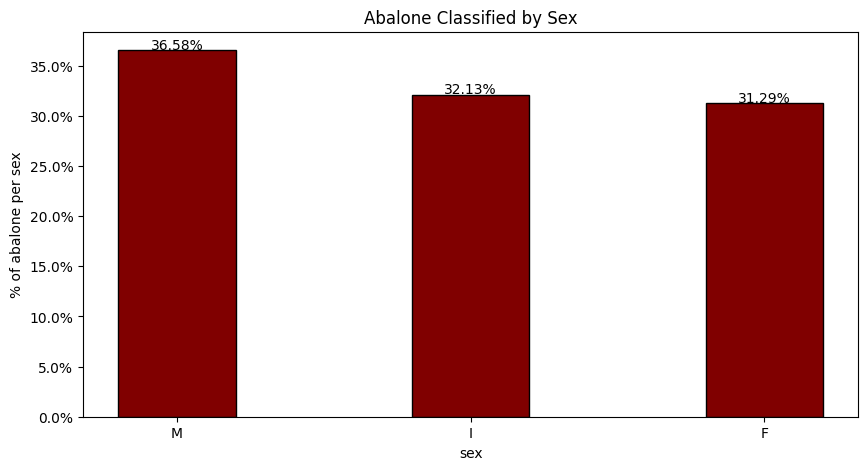

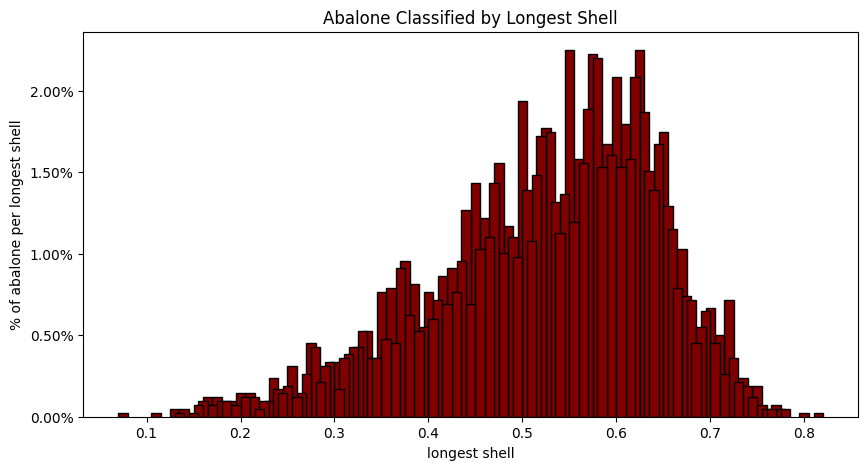

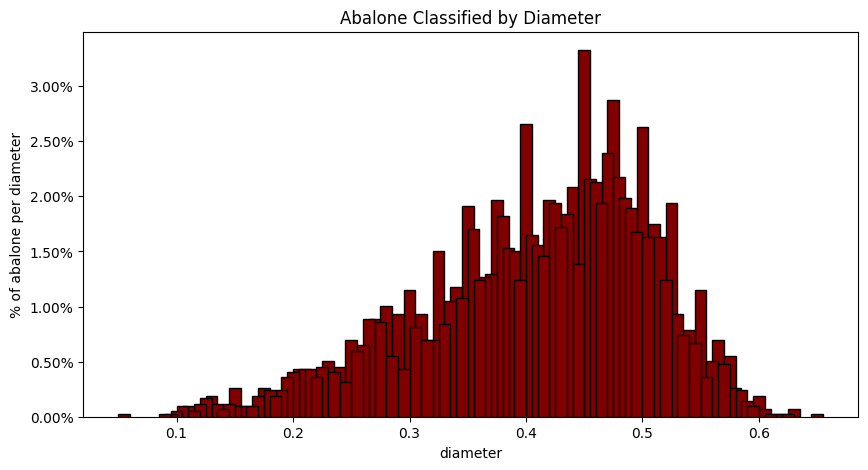

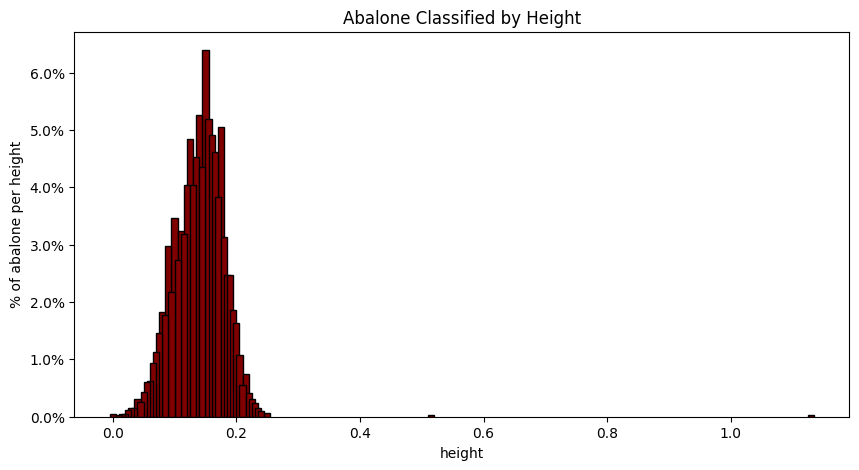

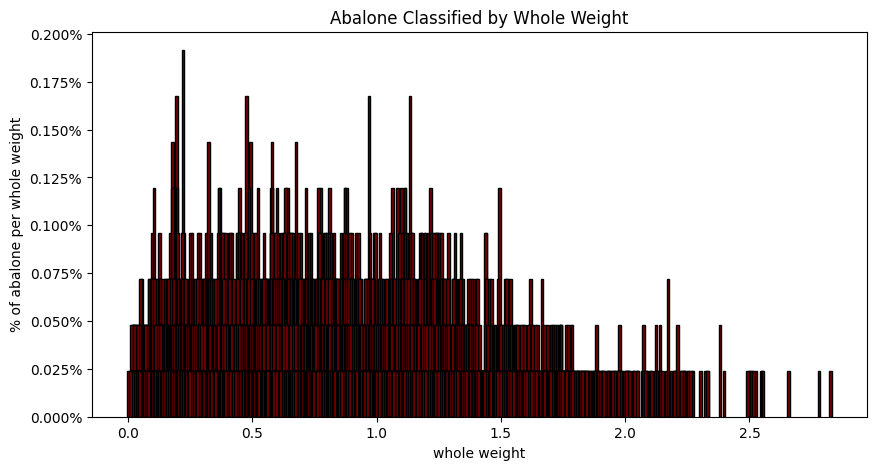

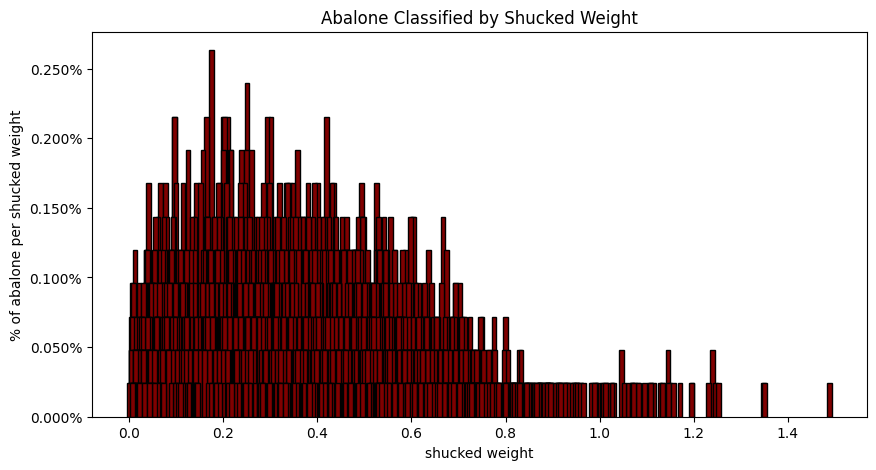

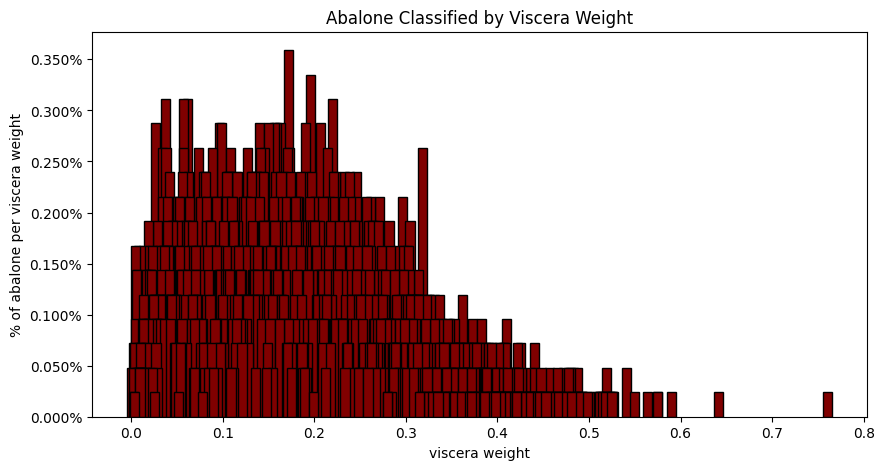

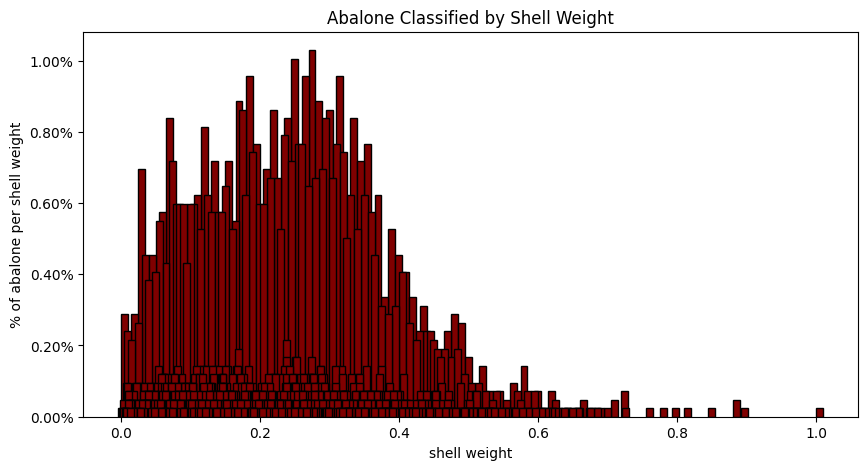

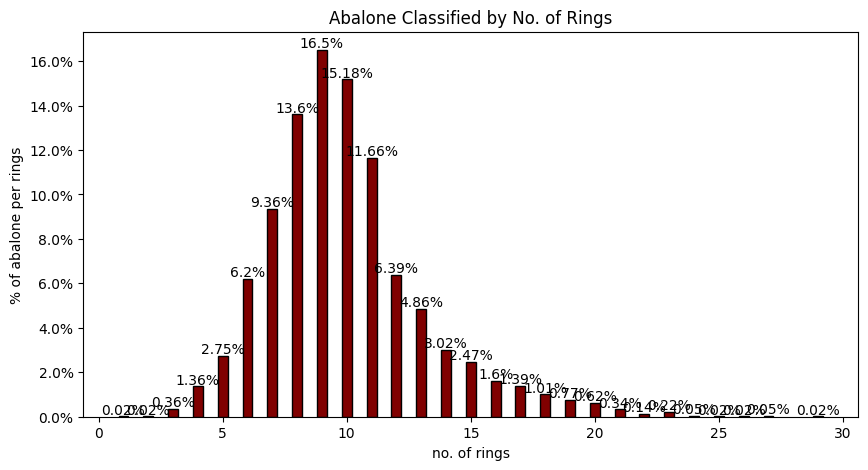

In [15]:
path = input("Enter the path to save abalone images (last character of path should be a backslash \): ")

imageAbalone = []

# % instances of sex
instanceType = abalone.Type.value_counts(normalize=True) * 100
instanceDictType = instanceType.to_dict()

figType = plt.figure(figsize = (10, 5))
figType = plt.gca()
figType.yaxis.set_major_formatter(mtick.PercentFormatter())

barsType = plt.bar(list(instanceDictType.keys()), list(instanceDictType.values()), color ='maroon', edgecolor = "black",
        width = 0.4)

for bar_graph in barsType:
    height = bar_graph.get_height()
    plt.text(x=bar_graph.get_x() + bar_graph.get_width() / 2, y=height + .10, s="{}%".format(round(height, 2)), ha='center')

plt.xlabel("sex")
plt.ylabel("% of abalone per sex")
plt.title("Abalone Classified by Sex")

figTypePath = path + "AbaloneSex.png"
plt.savefig(figTypePath, transparent = False, facecolor = 'white')
imageType = imageio.v2.imread(figTypePath)
imageAbalone.append(imageType)

plt.show()
plt.close

# % instances of longest shell
instanceLongestShell = abalone.LongestShell.value_counts(normalize=True) * 100
instanceDictLongestShell = instanceLongestShell.to_dict()

figLongestShell = plt.figure(figsize = (10, 5))
figLongestShell = plt.gca()
figLongestShell.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictLongestShell.keys()), list(instanceDictLongestShell.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("longest shell")
plt.ylabel("% of abalone per longest shell")
plt.title("Abalone Classified by Longest Shell")

figLongestShellPath = path + "AbaloneLongestShell.png"
plt.savefig(figLongestShellPath, transparent = False, facecolor = 'white')
imageLongestShell = imageio.v2.imread(figLongestShellPath)
imageAbalone.append(imageLongestShell)

plt.show()
plt.close

# % instances of diameter
instanceDiameter = abalone.Diameter.value_counts(normalize=True) * 100
instanceDictDiameter = instanceDiameter.to_dict()

figDiameter = plt.figure(figsize = (10, 5))
figDiameter = plt.gca()
figDiameter.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictDiameter.keys()), list(instanceDictDiameter.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("diameter")
plt.ylabel("% of abalone per diameter")
plt.title("Abalone Classified by Diameter")

figDiameterPath = path + "AbaloneDiameter.png"
plt.savefig(figDiameterPath, transparent = False, facecolor = 'white')
imageDiameter = imageio.v2.imread(figDiameterPath)
imageAbalone.append(imageDiameter)

plt.show()
plt.close

# % instances of height
instanceHeight = abalone.Height.value_counts(normalize=True) * 100
instanceDictHeight = instanceHeight.to_dict()

figHeight = plt.figure(figsize = (10, 5))
figHeight = plt.gca()
figHeight.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictHeight.keys()), list(instanceDictHeight.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("height")
plt.ylabel("% of abalone per height")
plt.title("Abalone Classified by Height")

figHeightPath = path + "AbaloneHeight.png"
plt.savefig(figHeightPath, transparent = False, facecolor = 'white')
imageHeight = imageio.v2.imread(figHeightPath)
imageAbalone.append(imageHeight)

plt.show()
plt.close

# % instances of whole weight
instanceWholeWeight = abalone.WholeWeight.value_counts(normalize=True) * 100
instanceDictWholeWeight = instanceWholeWeight.to_dict()

figWholeWeight = plt.figure(figsize = (10, 5))
figWholeWeight = plt.gca()
figWholeWeight.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictWholeWeight.keys()), list(instanceDictWholeWeight.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("whole weight")
plt.ylabel("% of abalone per whole weight")
plt.title("Abalone Classified by Whole Weight")

figWholeWeightPath = path + "AbaloneWhole.png"
plt.savefig(figWholeWeightPath, transparent = False, facecolor = 'white')
imageWholeWeight = imageio.v2.imread(figWholeWeightPath)
imageAbalone.append(imageWholeWeight)

plt.show()
plt.close

# % instances of shucked weight
instanceShuckedWeight = abalone.ShuckedWeight.value_counts(normalize=True) * 100
instanceDictShuckedWeight = instanceShuckedWeight.to_dict()

figShuckedWeight = plt.figure(figsize = (10, 5))
figShuckedWeight = plt.gca()
figShuckedWeight.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictShuckedWeight.keys()), list(instanceDictShuckedWeight.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("shucked weight")
plt.ylabel("% of abalone per shucked weight")
plt.title("Abalone Classified by Shucked Weight")

figShuckedWeightPath = path + "AbaloneShucked.png"
plt.savefig(figShuckedWeightPath, transparent = False, facecolor = 'white')
imageShuckedWeight = imageio.v2.imread(figShuckedWeightPath)
imageAbalone.append(imageShuckedWeight)

plt.show()
plt.close

# % instances of viscera weight
instanceVisceraWeight = abalone.VisceraWeight.value_counts(normalize=True) * 100
instanceDictVisceraWeight = instanceVisceraWeight.to_dict()

figVisceraWeight = plt.figure(figsize = (10, 5))
figVisceraWeight = plt.gca()
figVisceraWeight.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictVisceraWeight.keys()), list(instanceDictVisceraWeight.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("viscera weight")
plt.ylabel("% of abalone per viscera weight")
plt.title("Abalone Classified by Viscera Weight")

figVisceraWeightPath = path + "AbaloneViscera.png"
plt.savefig(figVisceraWeightPath, transparent = False, facecolor = 'white')
imageVisceraWeight = imageio.v2.imread(figVisceraWeightPath)
imageAbalone.append(imageVisceraWeight)

plt.show()
plt.close

# % instances of shell weight
instanceShellWeight = abalone.ShellWeight.value_counts(normalize=True) * 100
instanceDictShellWeight = instanceShellWeight.to_dict()

figShellWeight = plt.figure(figsize = (10, 5))
figShellWeight = plt.gca()
figShellWeight.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.bar(list(instanceDictShellWeight.keys()), list(instanceDictShellWeight.values()), color ='maroon', edgecolor = "black", width = 0.01)
plt.xlabel("shell weight")
plt.ylabel("% of abalone per shell weight")
plt.title("Abalone Classified by Shell Weight")

figShellWeightPath = path + "AbaloneShell.png"
plt.savefig(figShellWeightPath, transparent = False, facecolor = 'white')
imageShellWeight = imageio.v2.imread(figShellWeightPath)
imageAbalone.append(imageShellWeight)

plt.show()
plt.close

# % instances of rings
instanceRings = abalone.Rings.value_counts(normalize=True) * 100
instanceDictRings = instanceRings.to_dict()

figRings = plt.figure(figsize = (10, 5))
figRings = plt.gca()
figRings.yaxis.set_major_formatter(mtick.PercentFormatter())

barsRings = plt.bar(list(instanceDictRings.keys()), list(instanceDictRings.values()), color ='maroon', edgecolor = "black", width = 0.4)

for bar_graph in barsRings:
    height = bar_graph.get_height()
    plt.text(x=bar_graph.get_x() + bar_graph.get_width() / 2, y=height + .10, s="{}%".format(round(height, 2)), ha='center')

plt.xlabel("no. of rings")
plt.ylabel("% of abalone per rings")
plt.title("Abalone Classified by No. of Rings")

figRingsPath = path + "AbaloneRings.png"
plt.savefig(figRingsPath, transparent = False, facecolor = 'white')
imageRings = imageio.v2.imread(figRingsPath)
imageAbalone.append(imageRings)

plt.show()
plt.close

pathAbalone = path + "abalone-classes.gif"

imageio.mimsave(pathAbalone, imageAbalone, fps = 0.5)  


In [16]:
penguins_array = penguin_one_hot_vector.to_numpy()
abalone_array = abalone.to_numpy()

In [17]:
#part 3

Y_pen = penguins_array[:, 0]  
X_pen = penguins_array[:, 1:7]



Y_aba = abalone_array[:, 0]  
X_aba = abalone_array[:, 1:9]

print(X_pen)
print('\n')
print(Y_pen)
print('\n')

print(X_aba)
print('\n')
print(Y_aba)



[[39.1 18.7 181 3750 0 0]
 [39.5 17.4 186 3800 0 0]
 [40.3 18.0 195 3250 0 0]
 ...
 [50.4 15.7 222 5750 1 0]
 [45.2 14.8 212 5200 1 0]
 [49.9 16.1 213 5400 1 0]]


['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adel

In [18]:
X_pen_train, X_pen_test, y_pen_train, y_pen_test = train_test_split(X_pen, Y_pen, test_size=0.2, random_state=0) #split Dataset of penguin

X_aba_train, X_aba_test, y_aba_train, y_aba_test = train_test_split(X_aba, Y_aba, test_size=0.2, random_state=0) #split dataset of abalone


[Text(0.6, 0.9, 'x[2] <= 207.5\nentropy = 1.538\nsamples = 266\nvalue = [107, 58, 101]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 44.65\nentropy = 0.973\nsamples = 160\nvalue = [105, 54, 1]'),
 Text(0.13333333333333333, 0.5, 'x[0] <= 42.35\nentropy = 0.187\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0, 0]'),
 Text(0.2, 0.3, 'x[0] <= 42.6\nentropy = 0.918\nsamples = 9\nvalue = [6, 3, 0]'),
 Text(0.13333333333333333, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5333333333333333, 0.5, 'x[5] <= 0.5\nentropy = 0.435\nsamples = 55\nvalue = [3, 51, 1]'),
 Text(0.4666666666666667, 0.3, 'x[3] <= 4612.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.3, 'entropy = 0.0

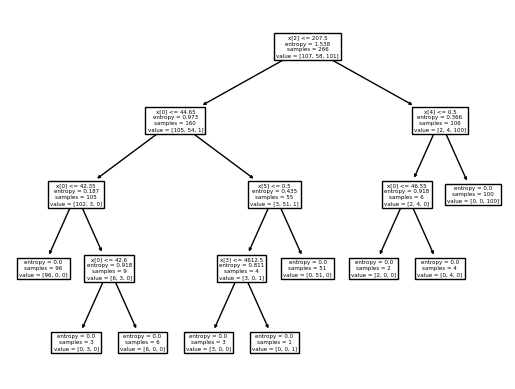

In [19]:
#Part 4 b
#print decision tree of penguin dataset
dtc_pen = tree.DecisionTreeClassifier(criterion="entropy") 
dtc_pen.fit(X_pen_train, y_pen_train) 
tree.plot_tree(dtc_pen) 

[Text(0.5119296358088701, 0.9857142857142858, 'x[3] <= 0.81\nentropy = 1.582\nsamples = 3341\nvalue = [1065, 1060, 1216]'),
 Text(0.24396024609120365, 0.9571428571428572, 'x[7] <= 8.5\nentropy = 1.414\nsamples = 1688\nvalue = [317, 958, 413]'),
 Text(0.12180934911710571, 0.9285714285714286, 'x[6] <= 0.126\nentropy = 1.076\nsamples = 983\nvalue = [88, 724, 171]'),
 Text(0.06058829062655777, 0.9, 'x[3] <= 0.139\nentropy = 0.767\nsamples = 652\nvalue = [28, 548, 76]'),
 Text(0.030100847425131333, 0.8714285714285714, 'x[7] <= 6.5\nentropy = 0.629\nsamples = 187\nvalue = [1, 160, 26]'),
 Text(0.02216342651175275, 0.8428571428571429, 'x[4] <= 0.047\nentropy = 0.542\nsamples = 160\nvalue = [1, 142, 17]'),
 Text(0.02093638559760727, 0.8142857142857143, 'x[0] <= 0.257\nentropy = 0.636\nsamples = 126\nvalue = [1, 108, 17]'),
 Text(0.015491391541086698, 0.7857142857142857, 'x[5] <= 0.014\nentropy = 0.496\nsamples = 92\nvalue = [0, 82, 10]'),
 Text(0.014264350626941216, 0.7571428571428571, 'x[0] <

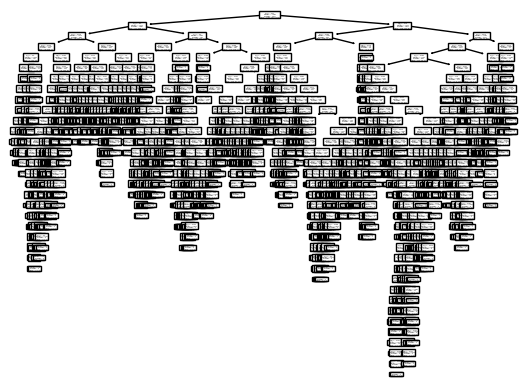

In [20]:
#print decision tree of abalone dataset
dtc_aba = tree.DecisionTreeClassifier(criterion="entropy") 
dtc_aba.fit(X_aba_train, y_aba_train) 
tree.plot_tree(dtc_aba) 

In [21]:
# evaluate classifier
y_pen_pred = dtc_pen.predict(X_pen_test)
print(classification_report(y_pen_test, y_pen_pred))

# show confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_pen_test, y_pen_pred))

#abalone
y_aba_pred = dtc_aba.predict(X_aba_test)
print(classification_report(y_aba_test, y_aba_pred))

# show confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_aba_test, y_aba_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.97      0.95        39
   Chinstrap       0.88      0.70      0.78        10
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.94        67
   macro avg       0.93      0.89      0.91        67
weighted avg       0.94      0.94      0.94        67

Confusion Matrix:
 [[38  1  0]
 [ 3  7  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           F       0.38      0.42      0.40       242
           I       0.64      0.59      0.61       282
           M       0.42      0.41      0.41       312

    accuracy                           0.47       836
   macro avg       0.48      0.47      0.48       836
weighted avg       0.48      0.47      0.48       836

Confusion Matrix:
 [[102  37 103]
 [ 40 166  76]
 [128  56 128]]
